# Çapraz Doğrulama ve Parametre Ayarlama

Bu ödevde, önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz.

**1. Modelinizin performansı çapraz doğrulama yaparak ve farklı metrikler kullanarak değerlendirin.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df1=train_df.copy()

## Eksik Değerleri Doldurma

### Age

In [3]:
train_df1= pd.concat([train_df, pd.get_dummies(train_df["Sex"], drop_first=True)], axis=1)
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
train_df1["Age"]=train_df1["Age"].fillna(train_df1.groupby("Sex")["Age"].transform("mean"))
train_df1["Age"]=train_df1["Age"].fillna(train_df1["Age"].mean())

In [5]:
train_df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
male             0
dtype: int64

### Dropna

In [6]:
train_df1.drop(["Cabin","Embarked"], axis=1, inplace=True)

In [7]:
train_df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
male           0
dtype: int64

In [8]:
X= train_df1[["Pclass","Age", "SibSp", "Parch", "Fare","male"]]
y = train_df1["Survived"]

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_train)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_train)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  712 
Eğitim veri kümesindeki hedef sayısı :  712 
Test veri kümesindeki satır sayısı :  179 
Test veri kümesindeki hedef sayısı :  179 


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


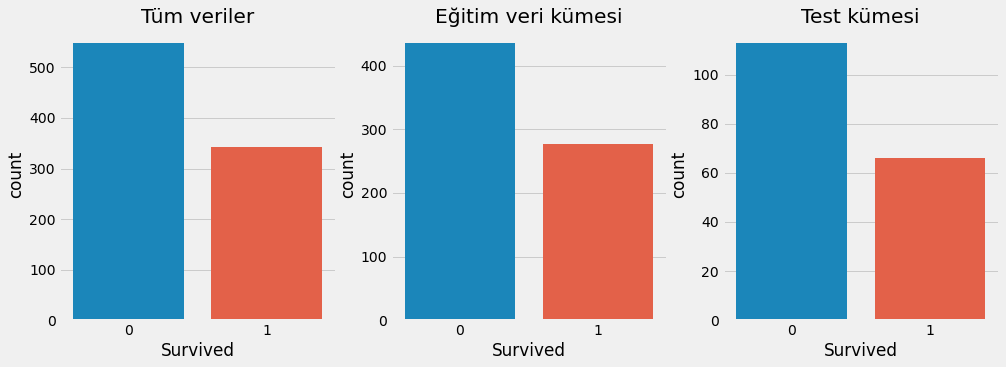

Tüm veri kümesi '0' yüzdesi : %62 
Test verisi '0' yüzdesi     : %63 
Eğitim verisi '0' yüzdesi   : %61 


In [10]:
import seaborn as sns

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_train)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.show()
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1111)
model = LogisticRegression()

model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.8547486033519553

### 1. KFold ile çapraz doğrulama

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=7, shuffle=True, random_state=1111)

In [13]:
parcalar = kf.split(X)
for num, (train_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(train_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*30)

1.Eğitim Kümesi Boyutu : 763
1.Test Kümesi Boyutu   : 128
------------------------------
2.Eğitim Kümesi Boyutu : 763
2.Test Kümesi Boyutu   : 128
------------------------------
3.Eğitim Kümesi Boyutu : 764
3.Test Kümesi Boyutu   : 127
------------------------------
4.Eğitim Kümesi Boyutu : 764
4.Test Kümesi Boyutu   : 127
------------------------------
5.Eğitim Kümesi Boyutu : 764
5.Test Kümesi Boyutu   : 127
------------------------------
6.Eğitim Kümesi Boyutu : 764
6.Test Kümesi Boyutu   : 127
------------------------------
7.Eğitim Kümesi Boyutu : 764
7.Test Kümesi Boyutu   : 127
------------------------------


veri kümemiz 7 farklı parçaya ayrıldı

**Veri kümelerini eğitip test etmek için**

In [14]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []


#for parcalar, (train_indeks, test_indeks) in enumerate(parcalar):
    #X_train, y_train = X[train_indeks], y[train_indeks]
    #X_test, y_test = X[test_indeks], y[test_indeks]
    
    
for parcalar, (train_index , test_index) in enumerate(parcalar):
    X_train2 , X_test2 = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train2 , y_test2 = y[train_index] , y[test_index]
     

    
    model2.fit(X_train2, y_train2)
    
    tahmin = model2.predict(X_test2)
    
    dogruluk_degeri = model2.score(X_test2, y_test2)
    
    dogruluk_liste.append(dogruluk_degeri)
    
    print("{}.Parça Doğruluk Değeri: {:.3f}".format(parcalar+1, dogruluk_degeri))
    print("-"*30)

1.Parça Doğruluk Değeri: 0.844
------------------------------
2.Parça Doğruluk Değeri: 0.812
------------------------------
3.Parça Doğruluk Değeri: 0.780
------------------------------
4.Parça Doğruluk Değeri: 0.748
------------------------------
5.Parça Doğruluk Değeri: 0.803
------------------------------
6.Parça Doğruluk Değeri: 0.732
------------------------------
7.Parça Doğruluk Değeri: 0.795
------------------------------


In [15]:
print("Ortalama doğruluk değeri : {:.2f}".format(np.mean(dogruluk_liste)))

Ortalama doğruluk değeri : 0.79


### 2. cross_val_score ve cross_validate ile çapraz doğrulama

In [16]:
from sklearn.model_selection import cross_validate, cross_val_score

In [17]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm, return_train_score=True,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.78888889 0.78651685 0.74157303 0.82022472 0.80898876 0.76404494
 0.79775281 0.7752809  0.79775281 0.80898876]
--------------------------------------------------
Eğitim Skorları          : 
[0.79775281 0.79800499 0.80299252 0.79551122 0.7967581  0.80174564
 0.8042394  0.80548628 0.79800499 0.8042394 ]


In [21]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Eğitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  0.7890012484394506
Eğitim Kümesi Ortalaması :  0.8004735352629663


In [18]:
cv = cross_validate(estimator=lrm, return_train_score=True,
                     X=X,
                     y=y,
                     cv=10,
                     scoring = ['accuracy', 'precision', 'r2'])

In [19]:
print('Test Kümesi Doğruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 0.79
Test Kümesi R-kare  Ortalaması      : 0.11
Test Kümesi Hassasiyet Ortalaması   : 0.74
Eğitim Kümesi Doğruluk Ortalaması   : 0.80
Eğitim Kümesi R-kare  Ortalaması    : 0.16
Eğitim Kümesi Hassasiyet Ortalaması : 0.76


In [20]:
cv = cross_val_score(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Skorları            : ', cv, sep = '\n')

Model Skorları            : 
[0.78888889 0.78651685 0.74157303 0.82022472 0.80898876 0.76404494
 0.79775281 0.7752809  0.79775281 0.80898876]


In [21]:
from sklearn.model_selection import cross_val_predict
y_tahmin = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_tahmin[0:10])

[0 1 1 1 0 0 0 0 1 1]


In [22]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test2,pred_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test2, pred_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test2, pred_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test2, pred_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test2, pred_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

ValueError: Found input variables with inconsistent numbers of samples: [127, 179]

**2. Hiperparemetre ayarlaması yaparak en uygun parametrelere sahip modeli belirleyin.**

In [23]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 1. Grid Search

In [24]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [27]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 0.1, 'penalty': 'l2'}
En iyi skor         :  0.7912484394506867


**Tüm Sonuçlar**

In [28]:
import pandas as pd

sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001024,0.000839,0.000000,0.000000,0.00001,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.007903,0.002786,0.001798,0.000395,0.00001,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.588889,0.595506,0.696629,0.752809,0.640449,0.651685,0.640449,0.662921,0.707865,0.651685,0.658889,0.047288,10
2,0.001501,0.001020,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.008665,0.002864,0.001896,0.000535,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.600000,0.595506,0.685393,0.741573,0.662921,0.640449,0.662921,0.674157,0.696629,0.651685,0.661124,0.041299,9
4,0.001196,0.000399,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [29]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.791248
11,l2,1,0.789001
13,l2,10,0.789001
15,l2,100,0.789001
17,l2,1000,0.789001
19,l2,10000,0.789001
7,l2,0.01,0.738552
5,l2,0.001,0.684669
3,l2,0.0001,0.661124
1,l2,0.00001,0.658889


**En başarılı 10 parametre kombinasyonunu**

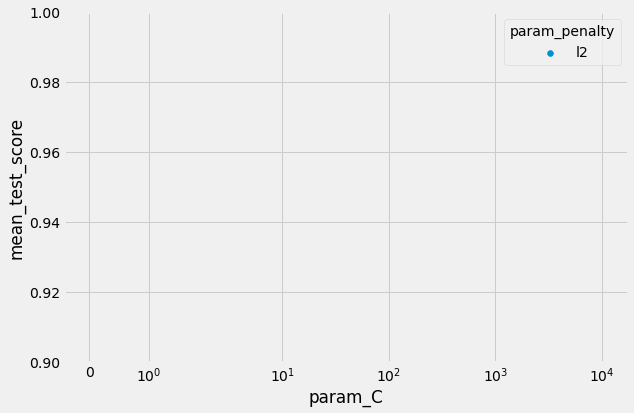

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()

### 2. RandomizedSearchCV

In [31]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [32]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [58]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.001}
Tüm hassasiyet değerleri   :  [0.66640325 0.75416141 0.73715831 0.73715831        nan 0.73715831
        nan        nan        nan        nan]
En iyi hassasiyet değeri   :  0.7541614087666718


In [33]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)

**Rastgele 10 kombinasyon**

In [34]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
1,l2,0.001,0.754161
2,l2,10,0.737158
3,l2,1,0.737158
5,l2,1000,0.737158
0,l2,0.0001,0.666403
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,0.00001,NaN


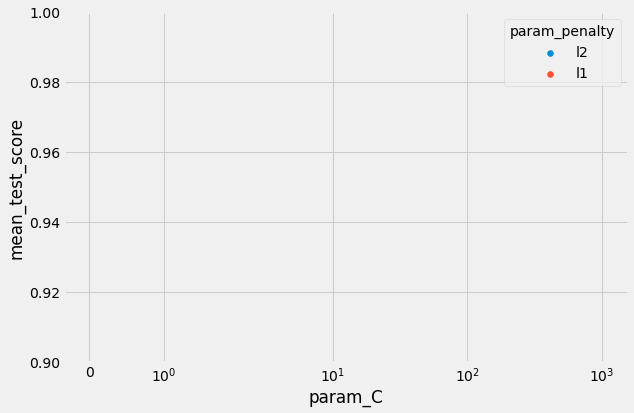

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.9,1))
plt.show()